### Importing Libraries

In [39]:
import pandas as pd
import numpy as nm

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

### Reading Test Data Excel Fle and Describing the data

In [40]:
train_data = pd.read_excel("train_data-1578037482430.xlsx", header=0, na_values='unknown')
train_data.describe()

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
count,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
mean,1979.058832,6.540897,14.607201,2012.984783,6.477174,14.505571,650.648777,76601.068011,1.524592,0.704212,0.510462,99967.894062,0.202717
std,10.464673,3.432135,8.068158,2.898385,3.433252,8.020220,96.769231,62442.214871,0.577415,0.456427,0.499924,57342.390262,0.402051
min,1926.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1974.000000,4.000000,8.000000,2010.000000,4.000000,8.000000,584.000000,0.000000,1.000000,0.000000,0.000000,51361.780000,0.000000
50%,1981.000000,7.000000,15.000000,2013.000000,6.000000,15.000000,652.000000,96913.725000,1.000000,1.000000,1.000000,99446.940000,0.000000
75%,1986.000000,10.000000,22.000000,2015.250000,9.000000,21.000000,718.000000,127660.767500,2.000000,1.000000,1.000000,149068.075000,0.000000
max,2000.000000,12.000000,28.000000,2018.000000,12.000000,28.000000,850.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


### Reading Test Dara Excel File and describing the data

In [41]:
test_data = pd.read_excel("test_data-1578037501169.xlsx", header= 0, na_values='unknown')
test_data.describe()

,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,1979.079348,6.428261,14.646739,2013.067391,6.496739,14.621196,650.783152,75116.590674,1.554348,0.707609,0.531522,100166.398853
std,10.722776,3.446675,8.205039,2.877756,3.468336,8.081591,96.329207,62614.929825,0.602950,0.454985,0.499141,58071.421408
min,1937.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,363.000000,0.000000,1.000000,0.000000,0.000000,106.670000
25%,1974.000000,4.000000,7.750000,2011.000000,4.000000,8.000000,584.000000,0.000000,1.000000,0.000000,0.000000,50050.127500
50%,1981.000000,6.000000,15.000000,2013.000000,7.000000,15.000000,651.000000,97372.095000,2.000000,1.000000,1.000000,100766.915000
75%,1986.000000,9.000000,22.000000,2016.000000,9.000000,22.000000,718.000000,127735.702500,2.000000,1.000000,1.000000,149760.675000
max,2000.000000,12.000000,28.000000,2018.000000,12.000000,28.000000,850.000000,205770.780000,4.000000,1.000000,1.000000,199953.330000


### Checking Columns of train_data

In [42]:
train_data.columns

Index(['CustomerID', 'CustomerName', 'yearofBirth', 'monthofBirth',
       'dayofBirth', 'yearofEntry', 'monthofEntry', 'dayofEntry', 'Gender',
       'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse',
       'CreditScore', 'AccountBalance', 'NumberOfProducts',
       'IsCreditCardCustomer', 'ActiveMember', 'Salary', 'Churn'],
      dtype='object')

### Checking Columns of test_data

In [43]:
test_data.columns

Index(['CustomerID', 'CustomerName', 'yearofBirth', 'monthofBirth',
       'dayofBirth', 'yearofEntry', 'monthofEntry', 'dayofEntry', 'Gender',
       'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse',
       'CreditScore', 'AccountBalance', 'NumberOfProducts',
       'IsCreditCardCustomer', 'ActiveMember', 'Salary'],
      dtype='object')

### Checking Na values (in file 'unknown')

In [44]:
train_data.isna().sum()

CustomerID                 0
CustomerName               0
yearofBirth                0
monthofBirth               0
dayofBirth                 0
yearofEntry                0
monthofEntry               0
dayofEntry                 0
Gender                     0
Location                   0
Education               1860
MaritalStatus              0
Occupation               781
Ownhouse                 191
CreditScore                0
AccountBalance             0
NumberOfProducts           0
IsCreditCardCustomer       0
ActiveMember               0
Salary                     0
Churn                      0
dtype: int64

In [45]:
test_data.isna().sum()

CustomerID                0
CustomerName              0
yearofBirth               0
monthofBirth              0
dayofBirth                0
yearofEntry               0
monthofEntry              0
dayofEntry                0
Gender                    0
Location                  0
Education               481
MaritalStatus             0
Occupation              177
Ownhouse                 59
CreditScore               0
AccountBalance            0
NumberOfProducts          0
IsCreditCardCustomer      0
ActiveMember              0
Salary                    0
dtype: int64

### Checking Datatypes of the columns

In [46]:
train_data.dtypes

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                     int64
dtype: object

In [47]:
test_data.dtypes

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
dtype: object

### Converting object to category 

In [48]:
for col in train_data[train_data.select_dtypes('object').columns]:
    train_data[col]=train_data[col].astype('category')
print(train_data.dtypes)

CustomerID              category
CustomerName            category
yearofBirth                int64
monthofBirth               int64
dayofBirth                 int64
yearofEntry                int64
monthofEntry               int64
dayofEntry                 int64
Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore                int64
AccountBalance           float64
NumberOfProducts           int64
IsCreditCardCustomer       int64
ActiveMember               int64
Salary                   float64
Churn                      int64
dtype: object


In [49]:
for col in test_data[test_data.select_dtypes('object').columns]:
    test_data[col]=test_data[col].astype('category')
print(test_data.dtypes)

CustomerID              category
CustomerName            category
yearofBirth                int64
monthofBirth               int64
dayofBirth                 int64
yearofEntry                int64
monthofEntry               int64
dayofEntry                 int64
Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore                int64
AccountBalance           float64
NumberOfProducts           int64
IsCreditCardCustomer       int64
ActiveMember               int64
Salary                   float64
dtype: object


### Backing up CustomerID column form test data for further use

In [50]:
test_customerID = test_data['CustomerID']
test_customerID

0       C5993228
1       C6546925
2       C7491750
3       C8462011
4       C3187447
          ...   
1835    C5458876
1836    C4306823
1837    C2409933
1838    C5212350
1839    C4383485
Name: CustomerID, Length: 1840, dtype: category
Categories (1840, object): [C2001443, C2003319, C2004181, C2006361, ..., C8993145, C8993460, C8999043, C8999901]

### Ploting the count of yes (1) and no (0) values in Churn

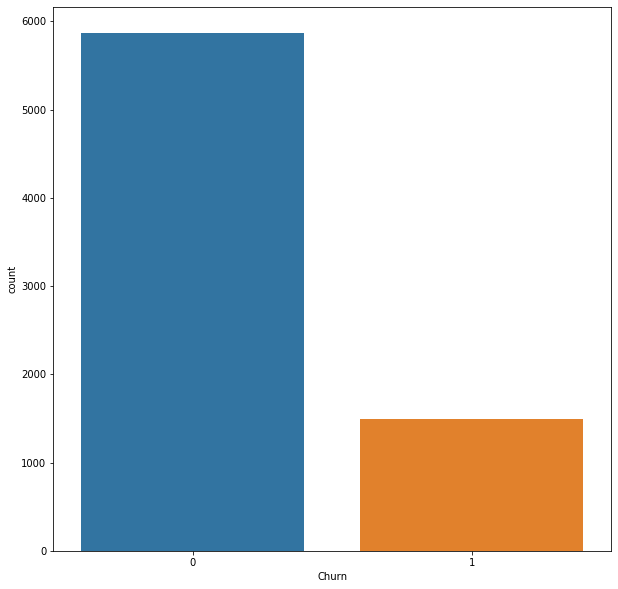

0    5868
1    1492
Name: Churn, dtype: int64
Percentage of people churned: 20.27173913043478 %


In [51]:
plt.figure(figsize=(10,10))
sns.countplot(x='Churn',data=train_data)
plt.show()

print(train_data.Churn.value_counts())

count_yes = len(train_data[train_data.Churn == 1])
count_no = len(train_data[train_data.Churn != 1])

percent_success = (count_yes/(count_yes + count_no))*100

print('Percentage of people churned:', percent_success, "%")

### Plot to check customer churned based on gender

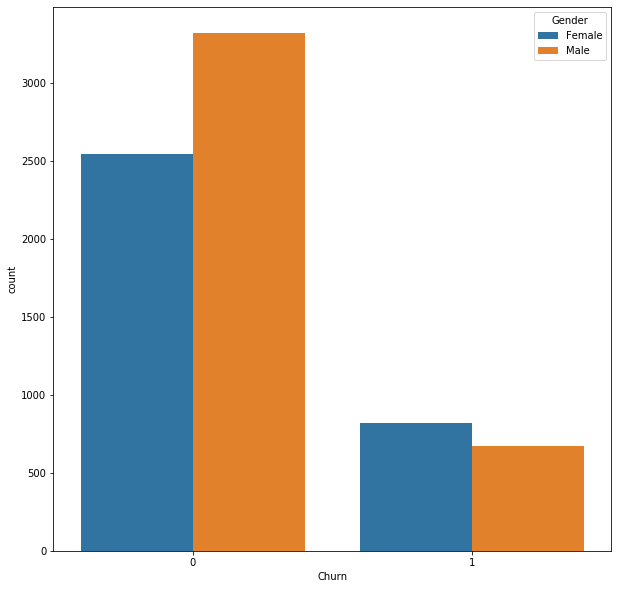

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(x='Churn',hue= 'Gender',data=train_data)
plt.show()

### Plot to check customer churned based on location

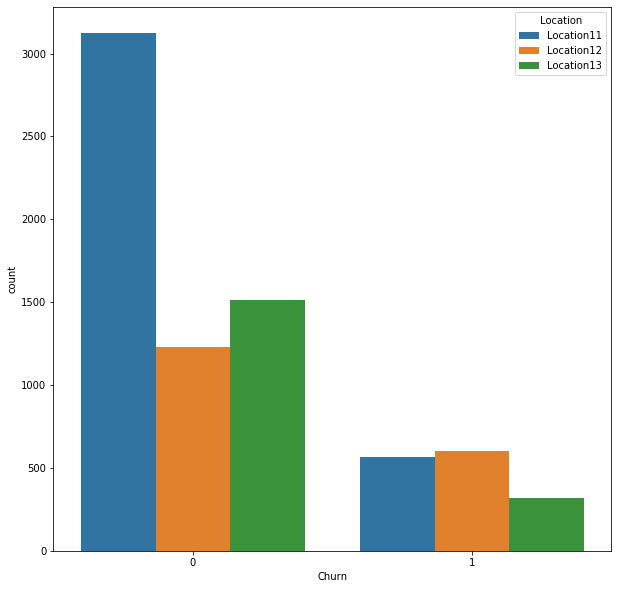

In [53]:
plt.figure(figsize=(10,10))
sns.countplot(x='Churn',hue= 'Location',data=train_data)
plt.show()

### Plot to check customer churned based on Education

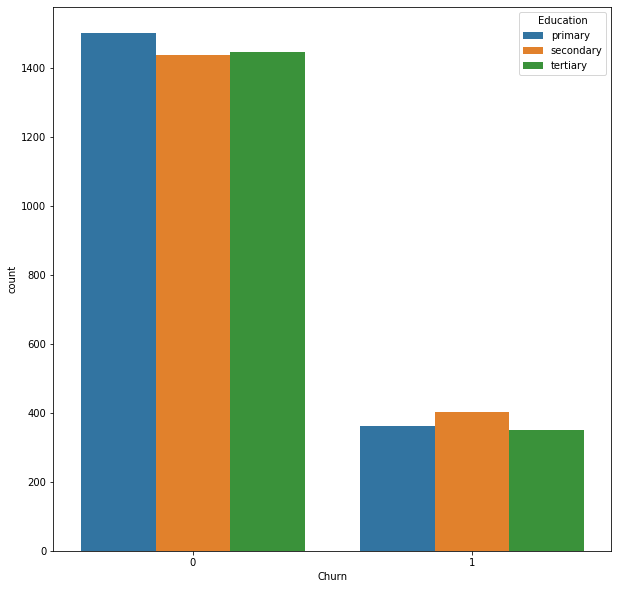

In [54]:
plt.figure(figsize=(10,10))
sns.countplot(x='Churn',hue= 'Education',data=train_data)
plt.show()

### Plot to check customer churned based on Marital Status

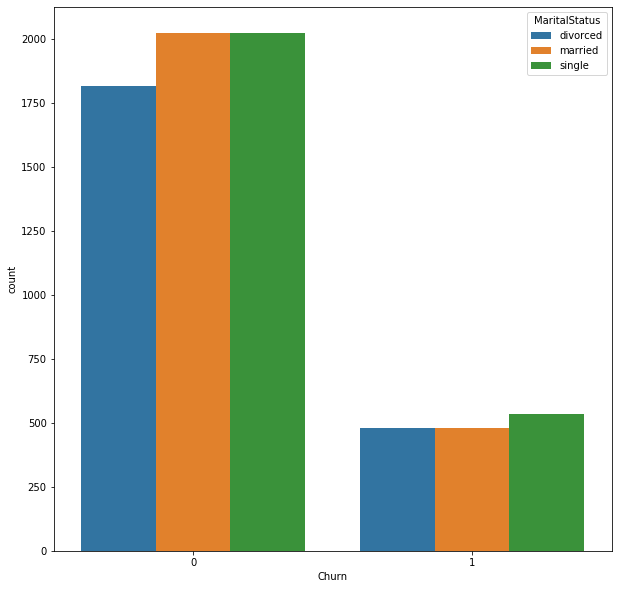

In [55]:
plt.figure(figsize=(10,10))
sns.countplot(x='Churn',hue= 'MaritalStatus',data=train_data)
plt.show()

### Plot to check customer churned based on Occupation

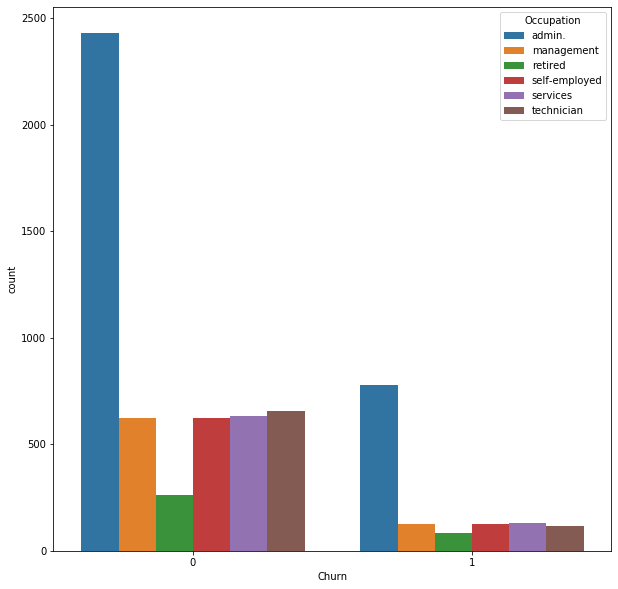

In [56]:
plt.figure(figsize=(10,10))
sns.countplot(x='Churn',hue= 'Occupation',data=train_data)
plt.show()

### Eliminating the unwanted columns

In [57]:
train_data.drop(["CustomerID","CustomerName","yearofBirth","monthofBirth","dayofBirth","monthofEntry","dayofEntry"],axis = 1, inplace=True)
test_data.drop(["CustomerID","CustomerName","yearofBirth","monthofBirth","dayofBirth","monthofEntry","dayofEntry"],axis = 1, inplace=True)

In [58]:
train_data.columns

Index(['yearofEntry', 'Gender', 'Location', 'Education', 'MaritalStatus',
       'Occupation', 'Ownhouse', 'CreditScore', 'AccountBalance',
       'NumberOfProducts', 'IsCreditCardCustomer', 'ActiveMember', 'Salary',
       'Churn'],
      dtype='object')

In [59]:
test_data.columns

Index(['yearofEntry', 'Gender', 'Location', 'Education', 'MaritalStatus',
       'Occupation', 'Ownhouse', 'CreditScore', 'AccountBalance',
       'NumberOfProducts', 'IsCreditCardCustomer', 'ActiveMember', 'Salary'],
      dtype='object')

### Splitting given train_data into 'train' and 'validation' (70,30)

In [60]:
Train, Val = train_test_split(train_data, train_size=0.7, random_state=42)

In [61]:
Train.shape

(5152, 14)

In [62]:
Val.shape

(2208, 14)

### X veriables and y veriables 

In [63]:
X_train, y_train = Train.loc[:,Train.columns!='Churn'], Train.loc[:,'Churn']

X_val, y_val = Val.loc[:,Val.columns!='Churn'], Val.loc[:,'Churn']

In [64]:
print(X_train.columns)
print(X_train.shape)

Index(['yearofEntry', 'Gender', 'Location', 'Education', 'MaritalStatus',
       'Occupation', 'Ownhouse', 'CreditScore', 'AccountBalance',
       'NumberOfProducts', 'IsCreditCardCustomer', 'ActiveMember', 'Salary'],
      dtype='object')
(5152, 13)


In [65]:
y_train.shape

(5152,)

In [66]:
print(X_val.columns)
print(X_val.shape)

Index(['yearofEntry', 'Gender', 'Location', 'Education', 'MaritalStatus',
       'Occupation', 'Ownhouse', 'CreditScore', 'AccountBalance',
       'NumberOfProducts', 'IsCreditCardCustomer', 'ActiveMember', 'Salary'],
      dtype='object')
(2208, 13)


In [67]:
y_val.shape

(2208,)

### Creating pipeline for preprocessing

In [68]:
cat_attr = list(X_train.select_dtypes('category').columns)
num_attr = list(X_train.columns.difference(cat_attr))

numeric_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy = 'median')),
                                        ('scalar',StandardScaler())])

catagorical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy = 'most_frequent',fill_value='missing_value')),
                                        ('onehot',OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,num_attr),
    ('cat',catagorical_transformer,cat_attr)
])

### Creating Logistic Regression pipeline

In [69]:
clf_logreg = Pipeline(steps=[('preprocessor',preprocessor),('classifier',LogisticRegression())])

### Fitting the Logistic Regression Model

In [70]:
clf_logreg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

### Prediction on Validation data

In [71]:
train_pred = clf_logreg.predict(X_train)
test_pred = clf_logreg.predict(X_val)

### Evaluating Model Performance on F1- Score

In [72]:
print(f1_score(y_train, train_pred))
print(f1_score(y_val, test_pred))

0.08680248007085915
0.07024793388429751


### Prediction on test data

In [73]:
y_test_pred = clf_logreg.predict(test_data)
data = {'CustomerID':test_customerID, 'Churn': y_test_pred}
pd.DataFrame(data).to_csv('LogisticRegression.csv')

### Creating Simple Decision Tree

In [74]:
decision_tree = Pipeline(steps=[('preprocessor',preprocessor),('classifier',tree.DecisionTreeClassifier())])
decision_tree.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [75]:
decision_train_pred = decision_tree.predict(X_train)
decision_pred = decision_tree.predict(X_val)

In [77]:
print(f1_score(y_train,decision_train_pred))
print(f1_score(y_val,decision_pred))

1.0
0.38864628820960695


### Decision tree GridSearch

In [78]:
dt_param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
            "max_depth": [None, 2, 5, 10],
           "min_samples_leaf": [1, 5, 10],
          "max_leaf_nodes": [None, 5, 10, 20],
         }

In [79]:
decision_tree_grid = Pipeline(steps=[('preprocessor',preprocessor),('classifier',GridSearchCV(tree.DecisionTreeClassifier(),dt_param_grid, cv=5))])
decision_tree_grid.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [80]:
decision_grid_pred_train = decision_tree_grid.predict(X_train)
decision_grid_pred=decision_tree_grid.predict(X_val)

In [81]:
print(f1_score(y_train,decision_grid_pred_train))
print(f1_score(y_val,decision_grid_pred))

0.4052805280528053
0.4324324324324324


### Prediction on test data

In [82]:
y_test_pred = decision_tree_grid.predict(test_data)
data = {'CustomerID':test_customerID, 'Churn': y_test_pred}
pd.DataFrame(data).to_csv('DecisionTreeGrid.csv')

### SVM

In [83]:
#clf_svc = Pipeline(steps=[('preprocessor',preprocessor),('classifier',SVC())])
#svc_param_grid = {'classifier__C': [0.001,0.01,0.1,1,10,100],
 #                'classifier__gamma': [0,0.0001,0.001,0.01,0.1,1,10,100],
#                 "classifier__kernel":['linear','rbf','poly']}
#svc_grid = GridSearchCV(clf_svc, param_grid=svc_param_grid, cv=5)

#svc_grid.fit(X_train,y_train)

In [84]:
#print(svc_grid.best_params_)
#svc_pred = svc_grid.predict(X_val)
#f1_score(y_val,svc_pred)

In [85]:
#y_test_pred = svc_pred.predict(test_data)
#data = {'CustomerID':test_customerID, 'Churn': y_test_pred}
#pd.DataFrame(data).to_csv('SVM.csv')

### Random Forest

In [86]:
randomForest =  Pipeline(steps=[('preprocessor',preprocessor),('classifier',RandomForestClassifier())])

hyperparameters = { 'classifier__n_estimators': [20, 30, 50],
                    'classifier__max_depth': [2, 4, 5, 10],
                    'classifier__min_samples_leaf': [2, 4]
                  }
clf = GridSearchCV(randomForest, hyperparameters, cv = 3, scoring='f1')
clf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [48]:
clf.best_params_

{'classifier__max_depth': 10,
 'classifier__min_samples_leaf': 2,
 'classifier__n_estimators': 30}

In [89]:
y_random_pred_train=clf.predict(X_train)
y_random_pred = clf.predict(X_val)

In [90]:
print(f1_score(y_train,y_random_pred_train))
print(f1_score(y_val,y_random_pred))

0.4529977794226499
0.26022304832713755


In [91]:
y_test_pred = clf.predict(test_data)
data = {'CustomerID':test_customerID, 'Churn': y_test_pred}
pd.DataFrame(data).to_csv('RandomForest.csv')

### GradientBoosting

In [92]:
gbCls =  Pipeline(steps=[('preprocessor',preprocessor),('classifier',GradientBoostingClassifier())])
gbCls.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [93]:
gb_pred_train = gbCls.predict(X_train)
gb_pred = gbCls.predict(X_val)

In [94]:
print(f1_score(y_train,gb_pred_train))
print(f1_score(y_val,gb_pred))

0.4449182658137882
0.3822075782537067


In [95]:
y_test_pred = gbCls.predict(test_data)
data = {'CustomerID':test_customerID, 'Churn': y_test_pred}
pd.DataFrame(data).to_csv('GradientBoosting.csv',index=False)

### Random Forest balanced (Gave the f1 best score)

In [96]:
randomForest =  Pipeline(steps=[('preprocessor',preprocessor),('classifier',RandomForestClassifier(class_weight='balanced'))])

hyperparameters = { 'classifier__n_estimators': [20, 30, 50],
                    'classifier__max_depth': [2, 4, 5, 10],
                    'classifier__min_samples_leaf': [2, 4]
                  }
clf = GridSearchCV(randomForest, hyperparameters, cv = 3, scoring='f1')
clf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [97]:
clf.best_params_

{'classifier__max_depth': 5,
 'classifier__min_samples_leaf': 4,
 'classifier__n_estimators': 30}

In [98]:
y_random_pred_train = clf.predict(X_train)
y_random_pred = clf.predict(X_val)

In [99]:
print(f1_score(y_train,y_random_pred_train))
print(f1_score(y_val,y_random_pred))

0.5288753799392096
0.4940991345397324


In [100]:
y_test_pred = clf.predict(test_data)
data = {'CustomerID':test_customerID, 'Churn': y_test_pred}
pd.DataFrame(data).to_csv('RandomForestBalanced.csv')